In [ ]:
Importing the Dataset

In [2]:
# Useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
WA = pd.read_csv('WAhousingdata.csv')
#https://www.kaggle.com/shree1992/housedata#data.csv
#WA.columns = WAdata.feature_names
WA.head()
#WAdata = sklearn.datasets.load_WA()
#print(WAdata.DESCR)
print(WA.head())
WA.info()

Loading BokehJS ...

       date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  05/02/14   313000.0         3       1.50         1340      7912     1.5   
1  05/02/14  2384000.0         5       2.50         3650      9050     2.0   
2  05/02/14   342000.0         3       2.00         1930     11947     1.0   
3  05/02/14   420000.0         3       2.25         2000      8030     1.0   
4  05/02/14   550000.0         4       2.50         1940     10500     1.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   
3           0     0          4        1000           1000      1963   
4           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Dens

In [3]:
WA = pd.read_csv('WAhousingdata.csv')
WA.head()
print(WA)# Load the WA Housing dataset
price = WA['price']
features = WA.drop('price', axis = 1)
print("Washington housing dataset has {} data points with {} variables each.".format(*WA.shape)) 
WA.shape

          date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     05/02/14  3.130000e+05         3       1.50         1340      7912   
1     05/02/14  2.384000e+06         5       2.50         3650      9050   
2     05/02/14  3.420000e+05         3       2.00         1930     11947   
3     05/02/14  4.200000e+05         3       2.25         2000      8030   
4     05/02/14  5.500000e+05         4       2.50         1940     10500   
5     05/02/14  4.900000e+05         2       1.00          880      6380   
6     05/02/14  3.350000e+05         2       2.00         1350      2560   
7     05/02/14  4.820000e+05         4       2.50         2710     35868   
8     05/02/14  4.525000e+05         3       2.50         2430     88426   
9     05/02/14  6.400000e+05         4       2.00         1520      6200   
10    05/02/14  4.630000e+05         3       1.75         1710      7320   
11    05/02/14  1.400000e+06         4       2.50         2920      4000   
12    05/02/

(4600, 18)

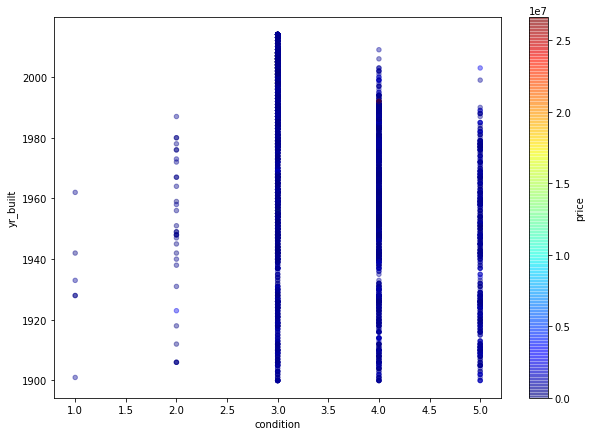

In [4]:
WA = pd.read_csv('WAhousingdata.csv')
WA.plot(kind="scatter", x="condition", y="yr_built", alpha=0.4, figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
#Color code from the most expensive to the cheapest area
#Create a scatter plot with house of year built and house condition to visualize the data

In [5]:
indexNames = WA[WA['price'] == 0].index
WA.drop(indexNames, inplace = True)
WA.describe()
#Describe the Washinton house datasetss in count, mean, min and max pices rows.
#The highest price would be $26,590,000, the lowest price would be $7,8000.
#The std shows the standard deviation in the 25%, 50% and 75% rows show the corresponding percentiles

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 18 columns):
date             4551 non-null object
price            4551 non-null float64
bedrooms         4551 non-null int64
bathrooms        4551 non-null float64
sqft_living      4551 non-null int64
sqft_lot         4551 non-null int64
floors           4551 non-null float64
waterfront       4551 non-null int64
view             4551 non-null int64
condition        4551 non-null int64
sqft_above       4551 non-null int64
sqft_basement    4551 non-null int64
yr_built         4551 non-null int64
yr_renovated     4551 non-null int64
street           4551 non-null object
city             4551 non-null object
statezip         4551 non-null object
country          4551 non-null object
dtypes: float64(3), int64(10), object(5)
memory usage: 675.5+ KB
skew:  25.02381726204781


/Users/bella_cc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


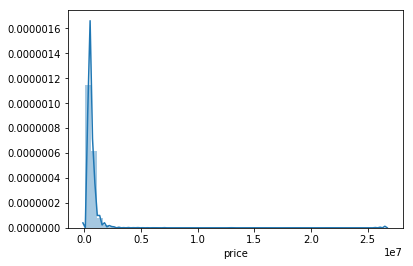

<Figure size 360x360 with 0 Axes>

In [6]:
WA.info()
WA.isnull().sum()
sns.distplot(WA['price'])
plt.figure(figsize = (5,5))
print("skew: ",WA.price.skew())

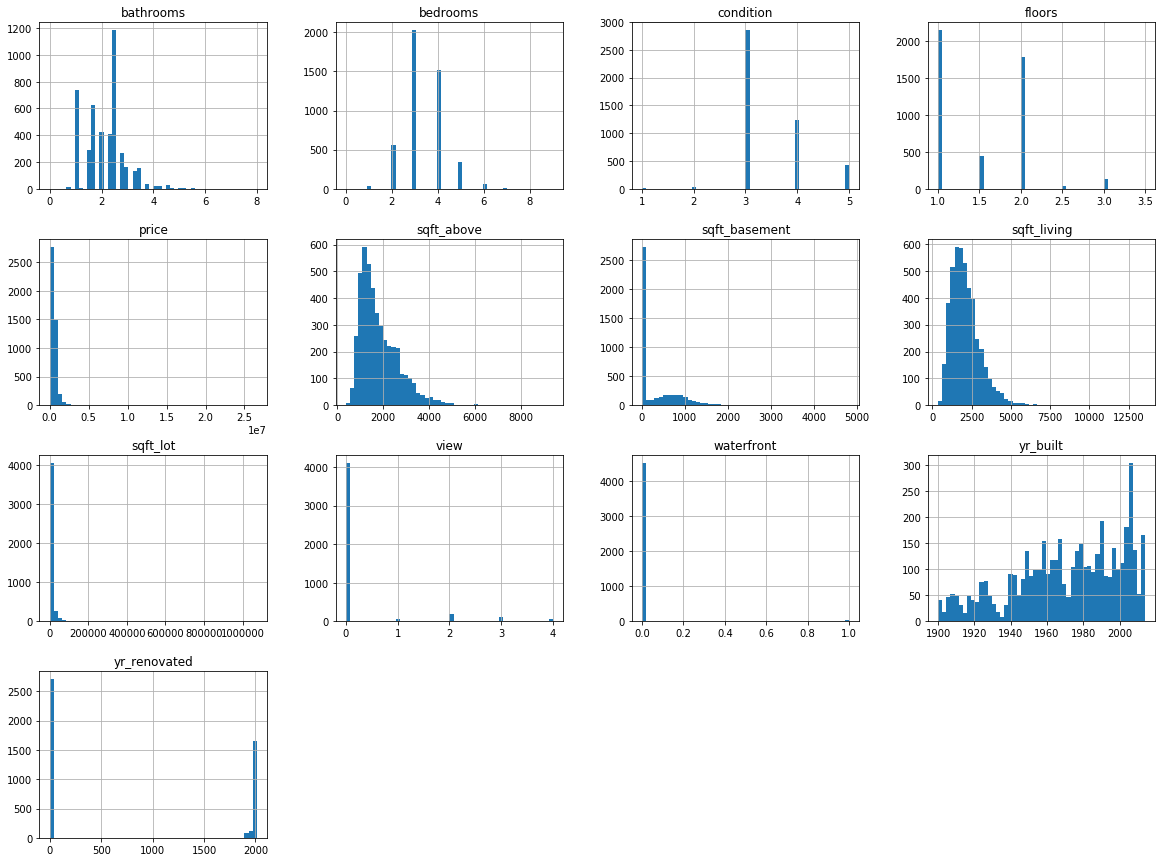

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
WA.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

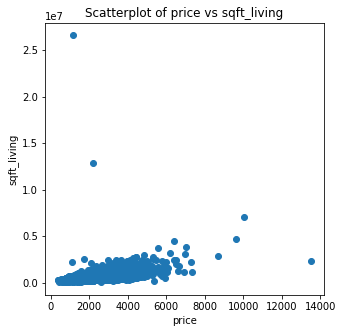

In [8]:
#* Generate a scatter plot of sqft_living (y-axis) and price (x-axis)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
scatter_plot= plt.figure(figsize=(5,5))
axis = scatter_plot.add_subplot(1,1,1)
axis.set_title('Scatterplot of price vs sqft_living')
axis.scatter(WA['sqft_living'],WA['price'])
axis.set_xlabel('price')
axis.set_ylabel('sqft_living')
plt.show()

/Users/bella_cc/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/bella_cc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


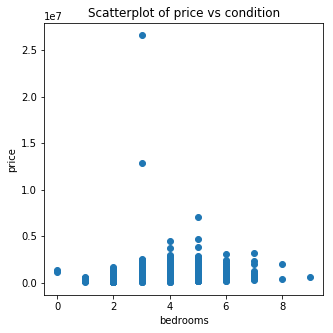

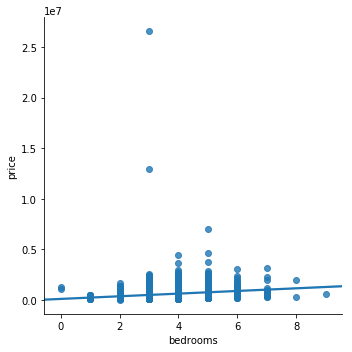

In [9]:
scatter_plot= plt.figure(figsize=(5,5))
axis = scatter_plot.add_subplot(1,1,1)
axis.scatter(WA['bedrooms'],WA['price'])
axis.set_title('Scatterplot of price vs condition')
axis.set_xlabel('bedrooms')
axis.set_ylabel('price')
scatter_plot.show()
sns.lmplot(x='bedrooms', y='price', data=WA)
plt.show()

/Users/bella_cc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

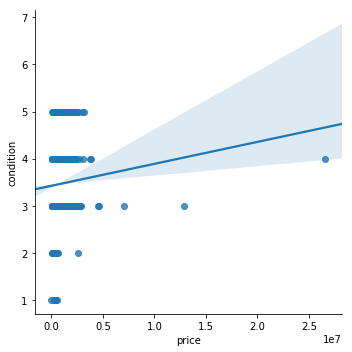

In [10]:
# WA.plot(kind="scatter", x="condition", y="price", alpha=0.5)
plt.savefig('scatter.png')
sns.lmplot(x='price', y='condition', data=WA)
plt.show()

In [11]:
corr_matrix = WA.corr()
#coefficients close to zero indicate that there is no linear correlation.
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.445494
sqft_above       0.380661
bathrooms        0.341126
view             0.242587
sqft_basement    0.217782
bedrooms         0.210228
floors           0.152758
waterfront       0.150083
sqft_lot         0.051347
condition        0.038892
yr_built         0.021757
yr_renovated    -0.029034
Name: price, dtype: float64

/Users/bella_cc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


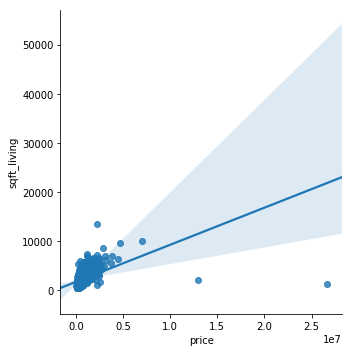

price            1.000000
sqft_living      0.818099
sqft_above       0.380661
bathrooms        0.341126
view             0.242587
sqft_basement    0.217782
bedrooms         0.210228
floors           0.152758
waterfront       0.150083
sqft_lot         0.051347
condition        0.038892
yr_built         0.021757
yr_renovated    -0.029034
Name: price, dtype: float64

In [12]:
#* Generate the plots using matplotlib and seaborn
sns.lmplot(x='price', y='sqft_living', data=WA)
plt.show()
WA['sqft_living'] = WA['price']/WA['sqft_living']
corr_matrix = WA.corr()
corr_matrix["price"].sort_values(ascending=False)
#the correlation between sqft of living variable and the house price

In [13]:
from sklearn.model_selection import train_test_split
#import train_test_split
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(features,price,test_size=0.2,random_state=10)
print(features.shape)
print(X_train.shape)
print(X_test.shape)

(4600, 17)
(3680, 17)
(920, 17)


In [14]:
#Constructing feature vectors and target vectors
features = ['sqft_living',
            'sqft_lot',
            'view',
            'bathrooms',
            'condition',
            'bedrooms',
            'sqft_above',
            'sqft_basement',
            "yr_built",
            "yr_renovated"
           ]
X = WA[features]
Y = np.log(WA['price'])
print(X.shape,Y.shape)

(4551, 10) (4551,)


In [17]:
#Feature preprocessing
X = WA[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'condition', 'yr_built', 
         'view', 'yr_renovated']]
Y = WA['price']
#Train and Build Linear Regression Model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)
print(model.intercept_,model.coef_)

2208118.5983824735 [ 2.43043187e+05  5.39379742e+04  1.27628994e+03  3.55867440e-01
  4.52245713e+03 -1.39486978e+03  8.99716995e+04  6.10186529e+00]


In [18]:
#A higher R-square value means a better fit
Y_predict = regressor.predict(X_test)#Linear Regression R squared
print('Linear Regression R squared": %.4f' % regressor.score(X_test, Y_test))

Linear Regression R squared": 0.5987


In [19]:
import numpy as np
#predict in Linear Regression MAE 
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(Y_predict, Y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)
#the value of every house in the test set within $616071 of the real price

Linear Regression RMSE: 225312.4584
